# Data augmentation

The idea is simple: we don't have that many images, so let's make the most of the few we have. We'll generate new images by applying a number of transformations to the ones we have: 

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Flatten, Dense
from keras.optimizers import Adam
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

Using TensorFlow backend.


In [2]:
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(72,72),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(72,72),
                                                        batch_size=100,
                                                        class_mode='binary')

Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [3]:
my_2nd_cnn = keras.Sequential()
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_2nd_cnn.add(MaxPooling2D((2,2)))
my_2nd_cnn.add(Flatten())
my_2nd_cnn.add(Dense(64, activation='relu'))
my_2nd_cnn.add(Dense(1, activation='sigmoid'))

my_2nd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                524352    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total para

In [4]:
my_2nd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_2nd_cnn.fit_generator(train_generator,
                                   steps_per_epoch=30,
                                   epochs=25,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/25
30/30 [==============================] - 113s 4s/step - loss: 0.3969 - acc: 0.8717 - val_loss: 0.3161 - val_acc: 0.8735
Epoch 2/25
30/30 [==============================] - 15s 488ms/step - loss: 0.2839 - acc: 0.8851 - val_loss: 0.3297 - val_acc: 0.8785
Epoch 3/25
30/30 [==============================] - 14s 480ms/step - loss: 0.3062 - acc: 0.8723 - val_loss: 0.2799 - val_acc: 0.8704
Epoch 4/25
30/30 [==============================] - 15s 506ms/step - loss: 0.2710 - acc: 0.8840 - val_loss: 0.2644 - val_acc: 0.8796
Epoch 5/25
30/30 [==============================] - 14s 473ms/step - loss: 0.2875 - acc: 0.8739 - val_loss: 0.2610 - val_acc: 0.8968
Epoch 6/25
30/30 [==============================] - 14s 471ms/step - loss: 0.2602 - acc: 0.8918 - val_loss: 0.2345 - val_acc: 0.9038
Epoch 7/25
30/30 [==============================] - 14s 483ms/step - loss: 0.2541 - acc: 0.8920 - val_loss: 0.2545 - val_acc: 0.8877
Epoch 8/25
30/30 [==============================] - 14s 474ms/step - lo

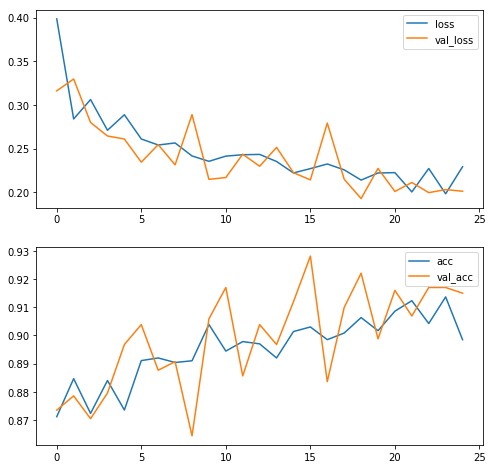

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

Wow, now I am underfitting! I guess that means I can make my model even a bit more complex, let's see

### One more layer

In [6]:
my_3rd_cnn = keras.Sequential()
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(72, 72, 3)))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Conv2D(32, (3, 3), activation='relu'))
my_3rd_cnn.add(MaxPooling2D((2,2)))
my_3rd_cnn.add(Flatten())
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(128, activation='relu'))
my_3rd_cnn.add(Dense(64, activation='relu'))
my_3rd_cnn.add(Dense(1, activation='sigmoid'))

my_3rd_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 70, 70, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 33, 33, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
__________

In [7]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-3),
                   metrics=['acc'])

history = my_3rd_cnn.fit_generator(train_generator,
                                   steps_per_epoch=30,
                                   epochs=20,
                                   validation_data=validation_generator,
                                   validation_steps=10,
                                   verbose=1)

Epoch 1/20
30/30 [==============================] - 20s 650ms/step - loss: 0.3632 - acc: 0.8834 - val_loss: 0.4055 - val_acc: 0.8694
Epoch 2/20
30/30 [==============================] - 15s 502ms/step - loss: 0.3436 - acc: 0.8643 - val_loss: 0.2856 - val_acc: 0.8684
Epoch 3/20
30/30 [==============================] - 16s 546ms/step - loss: 0.2958 - acc: 0.8800 - val_loss: 0.2996 - val_acc: 0.8785
Epoch 4/20
30/30 [==============================] - 17s 561ms/step - loss: 0.2693 - acc: 0.8904 - val_loss: 0.2556 - val_acc: 0.9109
Epoch 5/20
30/30 [==============================] - 15s 511ms/step - loss: 0.2629 - acc: 0.8894 - val_loss: 0.2327 - val_acc: 0.9028
Epoch 6/20
30/30 [==============================] - 16s 520ms/step - loss: 0.2540 - acc: 0.8893 - val_loss: 0.2515 - val_acc: 0.8957
Epoch 7/20
30/30 [==============================] - 18s 600ms/step - loss: 0.2443 - acc: 0.8923 - val_loss: 0.2356 - val_acc: 0.9028
Epoch 8/20
30/30 [==============================] - 15s 507ms/step - 

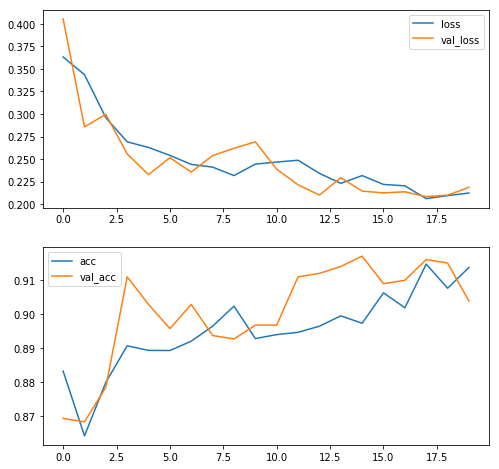

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)


axes[0].plot(history.epoch, history.history['loss'], label='loss')
axes[0].plot(history.epoch, history.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(history.epoch, history.history['acc'], label='acc')
axes[1].plot(history.epoch, history.history['val_acc'], label='val_acc')
axes[1].legend()

One of the best pieces of advice I got from Jeremy Howard's Deep Learning for Coders is that you should first attempt to overfit, then deal with that through regularization. Let's go for that. 

Once a model stops improving with a particular learning rate, it's often useful to reduce the learning rate and keep training.

In [9]:
my_3rd_cnn.compile(loss='binary_crossentropy',
                   optimizer=Adam(lr=1e-4),
                   metrics=['acc'])

history_pt2 = my_3rd_cnn.fit_generator(train_generator,
                                       steps_per_epoch=30,
                                       epochs=20,
                                       validation_data=validation_generator,
                                       validation_steps=10,
                                       verbose=1)

Epoch 1/20
30/30 [==============================] - 18s 596ms/step - loss: 0.2078 - acc: 0.9106 - val_loss: 0.1990 - val_acc: 0.9150
Epoch 2/20
30/30 [==============================] - 15s 487ms/step - loss: 0.1921 - acc: 0.9239 - val_loss: 0.1841 - val_acc: 0.9231
Epoch 3/20
30/30 [==============================] - 14s 478ms/step - loss: 0.2000 - acc: 0.9143 - val_loss: 0.1888 - val_acc: 0.9221
Epoch 4/20
30/30 [==============================] - 14s 482ms/step - loss: 0.1959 - acc: 0.9111 - val_loss: 0.1946 - val_acc: 0.9170
Epoch 5/20
30/30 [==============================] - 14s 475ms/step - loss: 0.1834 - acc: 0.9263 - val_loss: 0.1978 - val_acc: 0.9231
Epoch 6/20
30/30 [==============================] - 14s 473ms/step - loss: 0.1957 - acc: 0.9214 - val_loss: 0.1931 - val_acc: 0.9190
Epoch 7/20
30/30 [==============================] - 14s 476ms/step - loss: 0.1932 - acc: 0.9171 - val_loss: 0.1894 - val_acc: 0.9241
Epoch 8/20
30/30 [==============================] - 14s 465ms/step - 

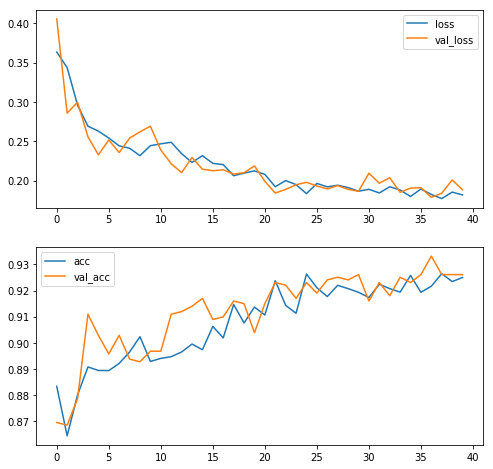

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

f, axes = plt.subplots(2,1)

f.set_size_inches(8,8)

nb_epochs = len(history.epoch)
concatenated = history.epoch + [nb_epochs + epoch_number for epoch_number in history_pt2.epoch]

axes[0].plot(concatenated, history.history['loss'] + history_pt2.history['loss'], label='loss')
axes[0].plot(concatenated, history.history['val_loss'] + history_pt2.history['val_loss'], label='val_loss')
axes[0].legend()

axes[1].plot(concatenated, history.history['acc'] + history_pt2.history['acc'], label='acc')
axes[1].plot(concatenated, history.history['val_acc'] + history_pt2.history['val_acc'], label='val_acc')
axes[1].legend()